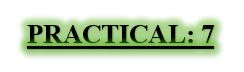

# 1) Implement clssification technique with quality measures in  any programming language.

In [1]:
%matplotlib inline
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("C:\\heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# imputation of missing value

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df.shape

(303, 14)

In [6]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(302, 14)

# feature selection - univariate selection

In [9]:
X = df.drop("output",axis=1)
y = df["output"]

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

feature = SelectKBest(score_func=chi2,k=10)
fit = feature.fit(X,y)
score = pd.DataFrame(fit.scores_)
column = pd.DataFrame(X.columns)
feature_score = pd.concat([column,score],axis=1)
feature_score

,0,0
0,age,22.210517
1,sex,7.721690
2,cp,62.116086
3,trtbps,15.094591
4,chol,21.690747
5,fbs,0.184946
6,restecg,2.877743
7,thalachh,186.180286
8,exng,38.518849
9,oldpeak,71.692782


# Correlation matrix

<AxesSubplot:>

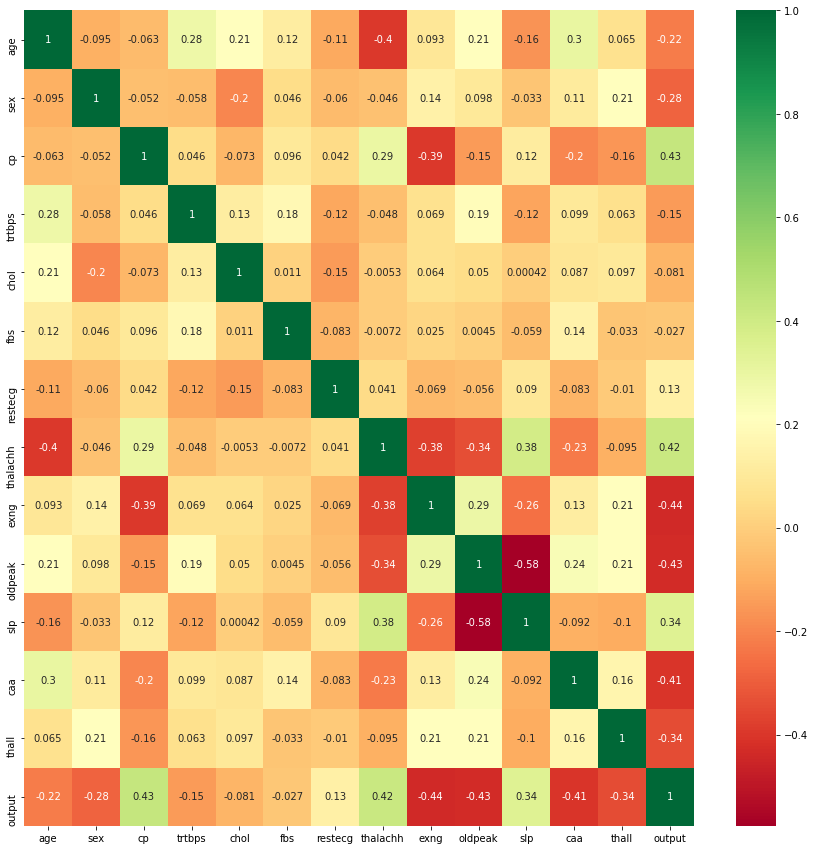

In [11]:
plt.figure(figsize = (15,15))
cor = df.corr()
top = cor.index
sns.heatmap(df[top].corr(),annot=True,cmap="RdYlGn")



In [12]:
X = df[["age","sex","cp","chol","thalachh","exng","oldpeak","caa"]]
X

,age,sex,cp,chol,thalachh,exng,oldpeak,caa
0,63,1,3,233,150,0,2.3,0
1,37,1,2,250,187,0,3.5,0
2,41,0,1,204,172,0,1.4,0
3,56,1,1,236,178,0,0.8,0
4,57,0,0,354,163,1,0.6,0
...,...,...,...,...,...,...,...,...
298,57,0,0,241,123,1,0.2,0
299,45,1,3,264,132,0,1.2,0
300,68,1,0,193,141,0,3.4,2
301,57,1,0,131,115,1,1.2,1


# train_test_split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 51)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 8)
(61, 8)
(241,)
(61,)


# feature scalling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [16]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X.columns)

# logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8852459016393442

In [18]:
from sklearn.linear_model import LogisticRegression
lr_sc = LogisticRegression()
lr_sc.fit(X_train_sc,y_train)
lr_sc.score(X_test_sc,y_test)

0.8688524590163934

In [19]:
y_pred = lr.predict(X_test)
collections.Counter(y_pred)

Counter({0: 29, 1: 32})

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61

